## Tercera entrega. Datos necesarios

### Carga de las librerias y del dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy import stats
import statsmodels.formula.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm


url_loa='https://raw.githubusercontent.com/AlejandroSenabre/Data-Coder/main/loans.csv'


loan=pd.read_csv(url_loa)

### Creacion de variables
Esto nos servira para los posteriores graficos

In [ ]:
deudores = loan.loc[loan['Loan Status']>0]
no_deudores = loan.loc[loan['Loan Status']==0]
print(no_deudores.columns)

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')


In [ ]:
grouped = loan.groupby("Grade")
grouped_sum = grouped.sum("Grade")
grouped_sum

## Resumen



Una de las funciones más importantes en un banco es su labor como prestamista de dinero, necesario para el crecimiento económico de un país al permitir a los usuarios hacerse de un monto de dinero en el apto que de otra forma le hubiera sido difícil o imposible de obtener, y esto es fundamental para mover la economía al ser habitualmente usado como método de financiación de diversos proyectos

Para un banco, hacer rentable el sistema de préstamos es fundamental para mantener su solvencia y continuar brindando servicios financieros a sus clientes. Esto implica que la banca debe financiarse con los intereses que cobra a sus clientes y tener un flujo de efectivo suficiente para poder seguir otorgando nuevos créditos y afrontar las pérdidas por morosidad. Este último es un factor clave que va a determinar la rentabilidad de un banco ya que es el mayor riesgo asociado con la concesión de préstamos. La morosidad puede ocurrir por múltiples causas, ya sea por no poseer los suficientes ingresos para afrontar el importe de las cuotas, tasas de intereses elevadas, monto total de la deuda excesivamente altos o por la simple falta de disposición para cumplir con los pagos. 

En este proyecto, con la base de datos que tenemos disponible de diferentes características de los préstamos dados, se tratará de buscar qué variables puede llevar al prestatario a tener dificultades con la puntualidad de sus pagos e intentar predecir cuales préstamos tienen más posibilidades de pasar a ser nuevos morosos.

Esta investigación puede ser una herramienta valiosa para ayudar a la banca a tomar decisiones informadas sobre la futura asignación de préstamos y a garantizar la rentabilidad del negocio a largo plazo.


## Caracteristicas del DataSet


Es un dataset obtenido a través de la página web de Kaggle, sin embargo, no se ha especificado el origen exacto de estos datos. Lo interesante de estos datos es que nos proporciona una columna llamada "*Loan Status*", la cual nos indica si el identificador correspondiente se encuentra al día con sus pagos. Esta columna toma como valor "0" para aquellos que no presentan morosidad, y un valor "1" que los define como deudores. Con esto se puede tener una mejor comprensión de cuales son las variables que tienen en común los deudores para separarlo de no deudores.
- **<font color='lightblue'>Archivo:</font>** loan.csv
- **<font color='lightblue'>Columnas:</font>** 35
- **<font color='lightblue'>Filas totales</font>** 67.463  

## Graficos

A diferencia de la anterior entrega, ahora nos vamos a enfoncar principalmente en graficos que mostraran la diferencia que se encuentran entre los deudores y los que no lo son, para esto vamos a realizar varios graficos para encontrar si existe alguna diferencia significativa entre estos dos grupos.

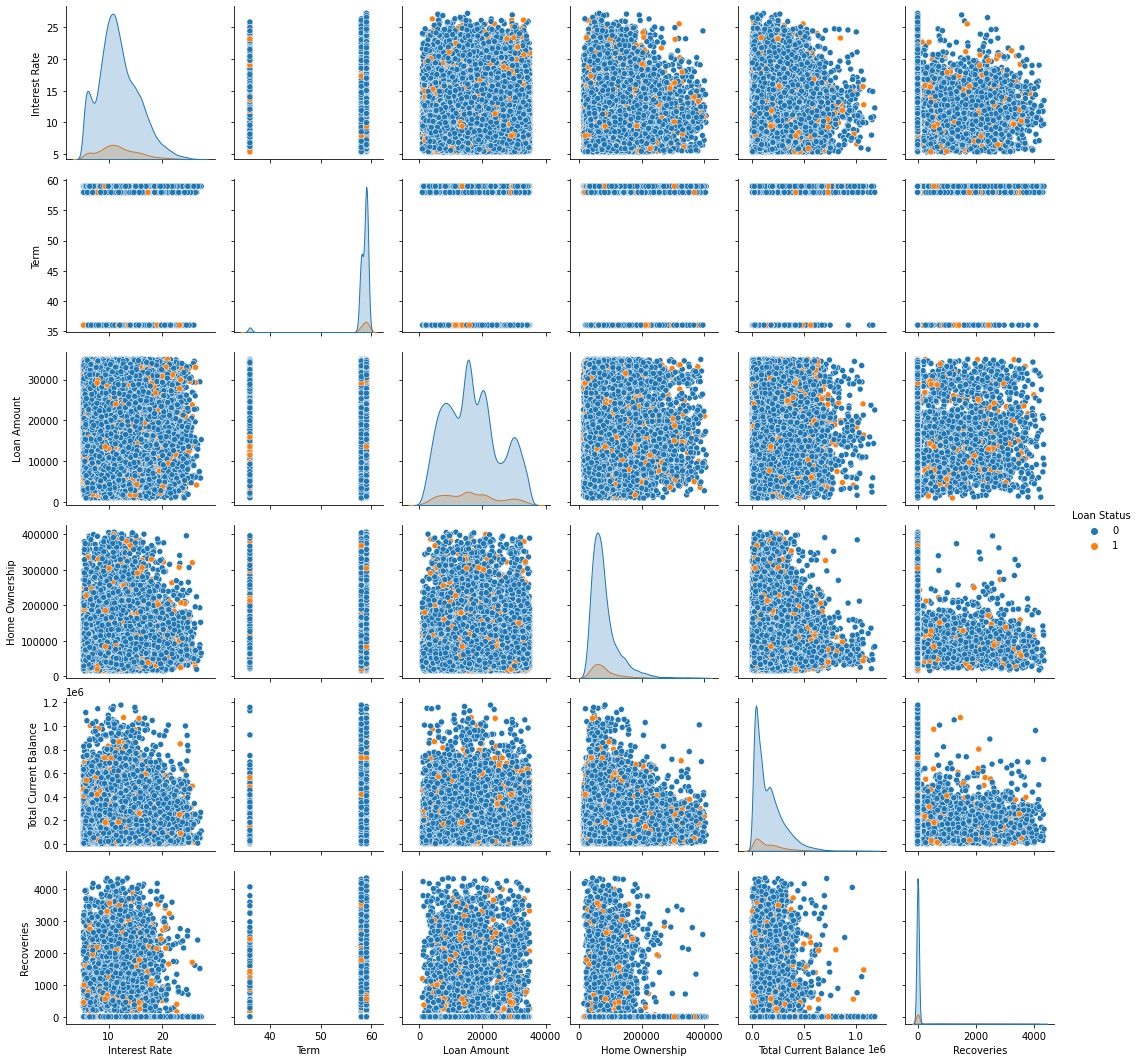

In [ ]:
sns.pairplot(loan, vars=['Interest Rate','Term','Loan Amount','Home Ownership','Total Current Balance','Recoveries'], hue="Loan Status")
plt.show()

En todos estos graficos no se consigue ver si nada que nos haga sospechar de un agrupamiento anormal. Para apreciar a mayor detalle se graficará los datos mas importantes para ver con mayor claritud.
Para investigar si existe alguna diferencia aparente en los montos de préstamos solicitados por los deudores y los no deudores, podemos crear un histograma superpuesto que presente la distribución de los montos en forma de densidad.

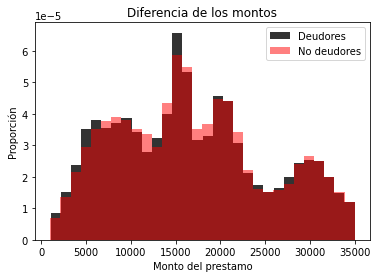

In [ ]:
fig, ax = plt.subplots()
ax.hist(deudores['Loan Amount'], 
        cumulative=False,  #acumulativo
        density=True,
        alpha=0.8,
        bins=30,
        label='Deudores',
        color='black')
ax.hist(no_deudores['Loan Amount'], 
        cumulative=False,  #acumulativo
        density=True,    #En proporsion
        alpha=0.5,                 #Transparencia 
        bins=30,
        label='No deudores',     #Etiqueta para la leyenda
        color='red')
ax.set_title('Diferencia de los montos')
ax.set_ylabel('Proporción')
ax.set_xlabel('Monto del prestamo')
ax.legend()
plt.show()

A simple vista no se puede observar un agrupamiento notable en los montos de los deudores. Sin embargo, se aprecia una ligera diferencia entre los valores de 10000 a 15000, pero esta diferencia no es suficiente para generar preocupación a priori.

Ahora haremos lo mismo que hicimos en el anterior grafico, pero esta vez compararemos si hay una diferencia en la tasa de intereses.

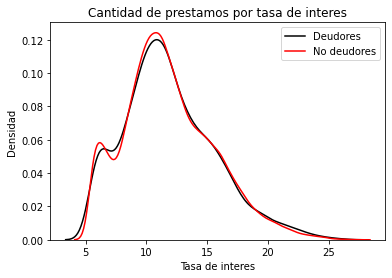

In [ ]:
sns.kdeplot(data=deudores, shade=False, x="Interest Rate", color='Black', label='Deudores')
sns.kdeplot(data=no_deudores , shade=False , x="Interest Rate", color='red', label='No deudores')
plt.xlabel("Tasa de interes")
plt.ylabel("Densidad")
plt.title("Cantidad de prestamos por tasa de interes")
plt.legend()
plt.show()

A igual que el primer grafico, no se puede observar un agrupamiento de los datos, nuevamente se ve una leve diferencia por algunas zonas como por ejemplo de 5% a 8%. 

Finlmente se realiza un histograma con los diferentes grados, obviamente por ser menor la cantidad de datos que posee los morosos las barras son mas chicas, pero aun asi se puede ver que la densidad son bastantes similares.

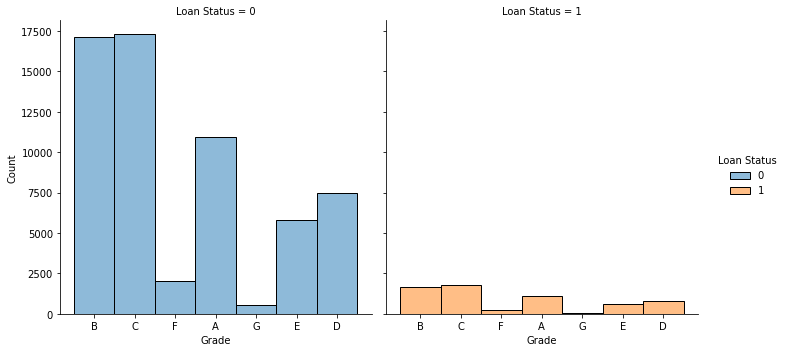

In [ ]:
sns.displot(data=loan, x="Grade", hue="Loan Status" , col='Loan Status')
plt.show()

## Conclusión

Con estos gráficos sencillos, aun no encontramos ninguna variable que se distinga facilmente entre los morosos y los que tienen las cuotas al dia. Esto puede ser ya que son gráficos sencillos de realizar, por lo que es probable que si en el pasado hubo un agrupamiento de los datos en alguna variable, por ejemplo, que haya mas deudores cuando la tasa de interes era mayor a 20, seguramente el banco ya haya tomado cartas en el asunto y tratado de solucionarlo.
    
Se seguira intentando hacer mas graficos con distintas variables para ver en cual hay mayor diferencia.

### Proximos pasos
- Intentar realizar una regresión lineal, pasando las variables calificativas a numericas.
- Sacar una muestra aleatoria con menor cantidad datos tanto para los deudores y no deudores para poder apreciar mejor los graficos.

## Regresión

No se encuentra una correlación entre el estado del prestamo con las principales variables. El proximo paso será cambiar las variables categoricas como "Grade" y "Sub-Grade" a numericas para comprobar si estas si tienen alguna relación con nuestra variable objetivo.

In [ ]:
loanREG=loan
loanREG = loanREG.rename(columns={'Loan Status': 'Loan_Status'})
loanREG = loanREG.rename(columns={'Interest Rate': 'Interest_Rate'})
loanREG = loanREG.rename(columns={'Loan Amount': 'Loan_Amount'})
loanREG = loanREG.rename(columns={'Total Accounts': 'Total_Accounts'})
loanREG = loanREG.rename(columns={'Revolving Utilities': 'Revolving_Utilities'})


In [ ]:
from statsmodels.formula.api import ols

model2 = 'Loan_Status ~ Interest_Rate + Loan_Amount +  Recoveries + Total_Accounts + Revolving_Utilities'
lm2 = ols(formula=model2, data=loanREG).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:            Loan_Status   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6230
Date:                Tue, 14 Feb 2023   Prob (F-statistic):              0.682
Time:                        03:12:43   Log-Likelihood:                -12154.
No. Observations:               67463   AIC:                         2.432e+04
Df Residuals:                   67457   BIC:                         2.437e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0896    